# Hotel Booking Demand Python project

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/Users/conniechung/Downloads/hotel_bookings.csv')

In [51]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [52]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [53]:
df.shape

(119390, 32)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [55]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [56]:
#fixing the data type of 'reservation_status_date' to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [57]:
#fixing the null values to 'Unknown'
replace_nulls = {
    'country' : 'Unknown',
    'agent' : 'Unknown',
    'company' : 'Unknown',
    'children' : 'Unknown'
    
}
df.fillna(replace_nulls, inplace=True)

In [58]:
df.duplicated().sum()

31994

In [59]:
#dropping duplicate values
df.drop_duplicates(inplace=True)


In [60]:
df.duplicated().sum()


0

In [61]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,Unknown,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,Unknown,Unknown,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,Unknown,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,Unknown,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,Unknown,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [62]:
df['is_canceled'].unique()

array([0, 1])

In [63]:
#finding the percentage of cancellations 
cancellation = df['is_canceled'].value_counts(normalize=True) * 100
cancellation

is_canceled
0    72.510184
1    27.489816
Name: proportion, dtype: float64

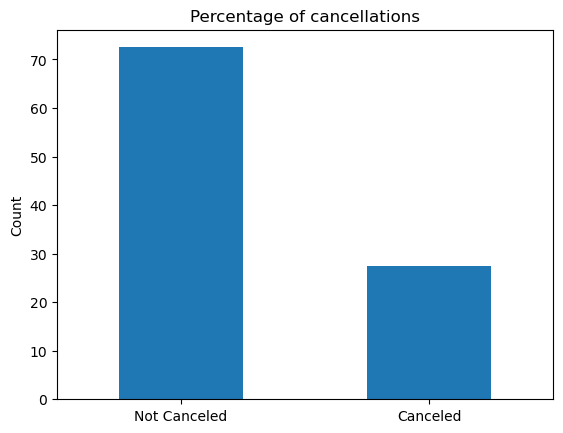

In [64]:
#bar graph of cancellation percentages
cancellation.plot(kind='bar')
plt.title('Percentage of cancellations')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'], rotation=0)
plt.show()

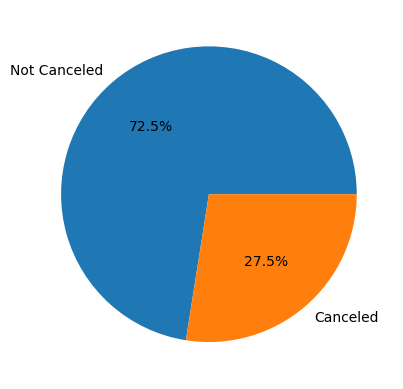

In [69]:
#pie chart of cancellation percentages
labels = ['Not Canceled', 'Canceled']
plt.pie(x = cancellation, labels=labels, autopct= "%1.1f%%");

In [114]:
#checking what months are the busiest in the 'arrival_date_month' column
#1 means cancelled, 0 means not cancelled 
not_cancelled = df[df['is_canceled']==0]

months_not_cancelled = not_cancelled['arrival_date_month'].value_counts()
months_not_cancelled

arrival_date_month
August       7634
July         6859
May          5913
March        5683
April        5499
June         5411
October      5292
September    5048
February     4683
November     3941
December     3753
January      3655
Name: count, dtype: int64

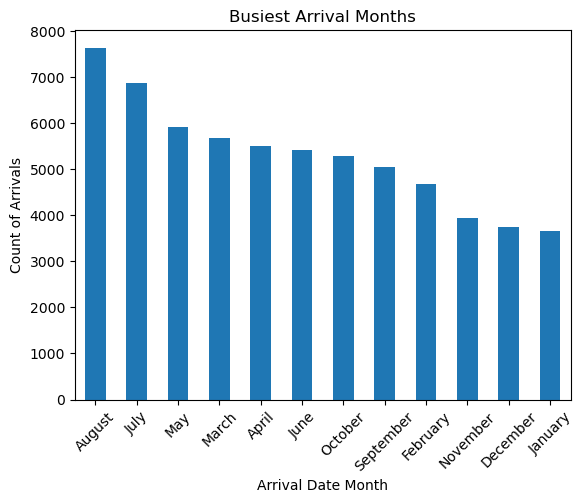

In [140]:
months_not_cancelled.plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Busiest Arrival Months')
plt.ylabel('Count of Arrivals')
plt.xlabel('Arrival Date Month')
plt.show()

In [109]:
#finding what is the most common customer type
cust_type = df['customer_type'].value_counts()
cust_type

customer_type
Transient          71986
Transient-Party    11727
Contract            3139
Group                544
Name: count, dtype: int64

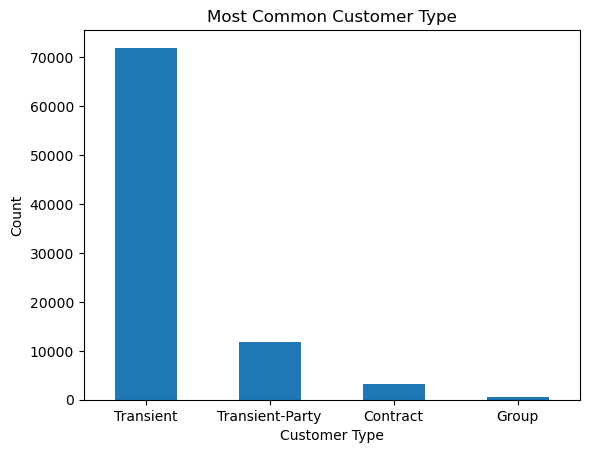

In [113]:
cust_type.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Most Common Customer Type')
plt.ylabel('Count')
plt.xlabel('Customer Type')
plt.show()

In [130]:
#finding top 10 countries that made reservations that didn't cancell
not_cancelled = df[df['is_canceled']==0]
is_cancelled = df[df['is_canceled']==1]

top10_country_not_cancelled = not_cancelled['country'].value_counts().head(10)


country
PRT    17662
GBR     8448
FRA     7104
ESP     5390
DEU     4334
IRL     2348
ITA     1991
BEL     1670
NLD     1561
USA     1416
Name: count, dtype: int64

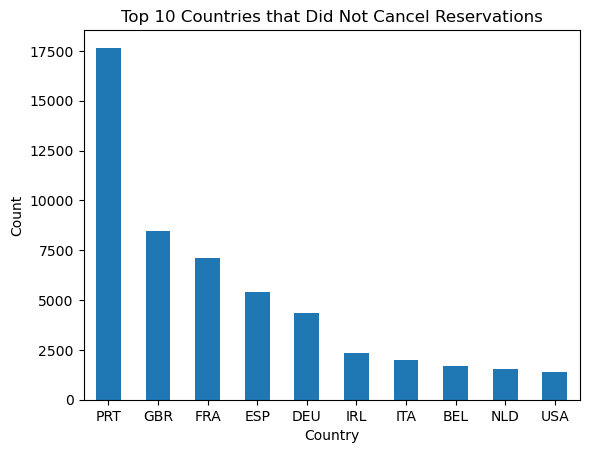

In [138]:
top10_country_not_cancelled.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Top 10 Countries that Did Not Cancel Reservations')
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

In [131]:
top10_country_cancelled = is_cancelled['country'].value_counts().head(10)
top10_country_cancelled

country
PRT    9791
GBR    1985
ESP    1862
FRA    1733
ITA    1075
DEU    1053
BRA     727
IRL     668
USA     459
BEL     411
Name: count, dtype: int64

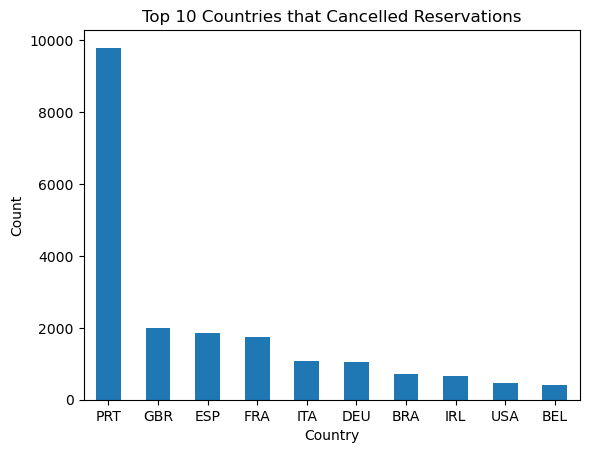

In [137]:
top10_country_cancelled.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Top 10 Countries that Cancelled Reservations')
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

In [134]:
top10_reservation_country = df['country'].value_counts().head(10)
top10_reservation_country

country
PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
Name: count, dtype: int64

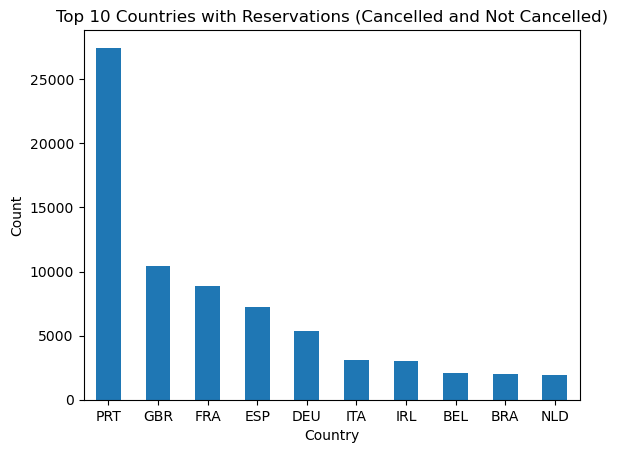

In [141]:
top10_reservation_country.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Top 10 Countries with Reservations (Cancelled and Not Cancelled)')
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()